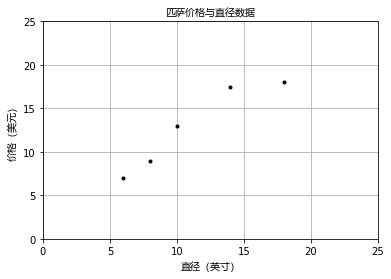

In [2]:
%matplotlib inline                   
#绘制直径与价格的散点图
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)
def runplt(size=None):
    plt.figure(figsize=size)
    plt.title('匹萨价格与直径数据',fontproperties=font)
    plt.xlabel('直径（英寸）',fontproperties=font)
    plt.ylabel('价格（美元）',fontproperties=font)
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt
plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

In [3]:
from sklearn import linear_model        
#调用sklearn中的linear_model模块进行线性回归。
import numpy as np
model = linear_model.LinearRegression()
#调用线性回归方法
model.fit(X, y)
display(model.intercept_)
#截距
display(model.coef_)   
#线性模型的系数
a = model.predict([[12]])
#模型预测
print("预测一张12英寸匹萨价格：{:.2f}".format(model.predict([[12]])[0][0]))

array([1.96551724])

array([[0.9762931]])

预测一张12英寸匹萨价格：13.68


In [4]:
a = model.predict([[7],[13],[20]])
print("预测一张7英寸匹萨价格：{:.2f}".format(model.predict([[7]])[0][0]))
print("预测一张13英寸匹萨价格：{:.2f}".format(model.predict([[13]])[0][0]))
print("预测一张20英寸匹萨价格：{:.2f}".format(model.predict([[20]])[0][0]))

预测一张7英寸匹萨价格：8.80
预测一张13英寸匹萨价格：14.66
预测一张20英寸匹萨价格：21.49


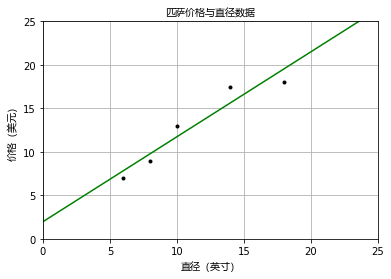

In [5]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = linear_model.LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X2, y2, 'g-')
plt.show()

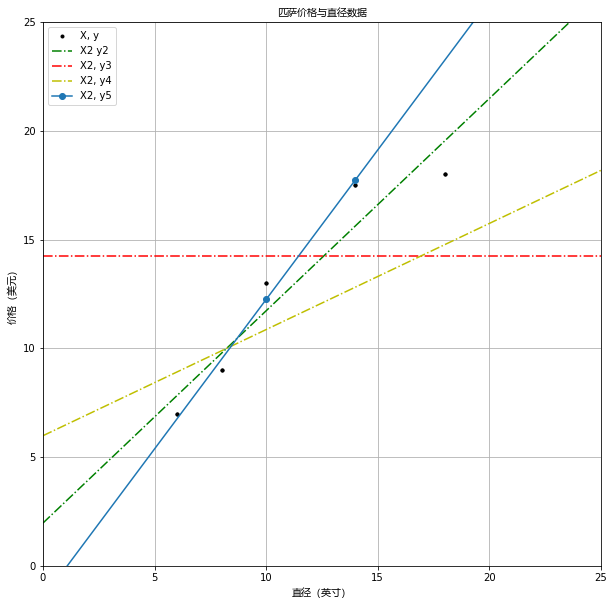

In [7]:
plt = runplt(size=(10,10))
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2*0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.', label="X, y") 
plt.plot(X2, y2, 'g-.', label="X2 y2")
plt.plot(X2, y3, 'r-.',label="X2, y3")
plt.plot(X2, y4, 'y-.',label="X2, y4")
plt.plot(X2, y5, 'o-', label="X2, y5")
plt.legend()
plt.show()

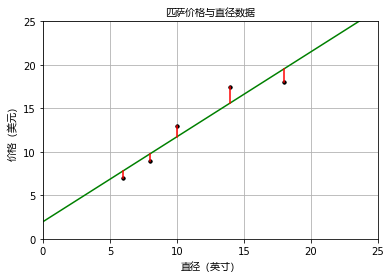

In [8]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = linear_model.LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
# 残差预测值
yr = model.predict(X)
#  enumerate 函数可以把一个 list 变成索引-元素对
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
plt.show()

In [9]:
import numpy as np
print('残差平方和:{:.2f}'.format(np.mean((model.predict(X) - y) ** 2)))

残差平方和:1.75


In [12]:
#公式计算
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print(variance)
#直接计算
import numpy as np
print(np.var([6, 8, 10, 14, 18], ddof=1))

23.2
23.2


In [13]:
#公式计算
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
#算出(x,y)的协方差
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 - xbar) *(13 - ybar) +(14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) / 4
print(cov)
#直接计算
import numpy as np
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.65
22.650000000000002


In [2]:
import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(922.72437, shape=(), dtype=float32)


In [3]:
from numpy import *
eye(4)
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [3]:
import numpy as np  
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
# 导入数据
iris_dataset=load_iris()
from sklearn.model_selection import train_test_split
#设置训练集为70%数据，测试集为30%的数据 150   105 训练集   45 预测 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0,test_size=0.3)
#criterion = gini/entropy 可以用来选择用基尼指数或者熵来做损失函数。
#splitter = best/random 用来确定每个节点的分裂策略。支持“最佳”或者“随机”。
#max_depth = int 用来控制决策树的最大深度，防止模型出现过拟合。
#min_samples_leaf = int 用来设置叶节点上的最少样本数量，用于对树进行修剪。
model = DecisionTreeClassifier(criterion = 'entropy')  
model.fit(X_train,y_train)
result = model.predict(X_test)
print('预测正确率：',np.round(accuracy_score(result, y_test),2)*100,'%')

预测正确率： 98.0 %


In [2]:
import numpy as np   #导入np数据集合
from sklearn.decomposition import PCA  #导入PCA算法方法
r1 = [1, 2, 3, 4, 5, 9]
r2 = [4, 5, 4, 5, 2, 5]
array = np.array([r1, r2])   #新建一个2行6列的矩阵
cov_f = np.cov(array)     #计算协方差矩阵 
print("协方差矩阵：", cov_f)
eigenvalue, featurevector = np.linalg.eig(cov_f)  #计算协方差矩阵的特征值和特征向量
print("特征值：", eigenvalue)
print("特征向量：", featurevector)
array = array.T      #将矩阵转置  6行2列
#取前2个主成分
pca = PCA(n_components=2)  #调用Sklearn包含pca  模型训练 2列
pca.fit(array) #调用fit函数来进行模型拟合，计算
print("方差贡献率：", pca.explained_variance_ratio_)
new_data = array.dot(pca.components_.T)   #输出降维后的数据矩阵
print("降维后的数据矩阵为:",new_data[:2])   #输出结果

协方差矩阵： [[8.         0.2       ]
 [0.2        1.36666667]]
特征值： [8.00602468 1.36064199]
特征向量： [[ 0.9995466  -0.03010974]
 [ 0.03010974  0.9995466 ]]
方差贡献率： [0.85473573 0.14526427]
降维后的数据矩阵为: [[ 1.11998554 -3.96807666]
 [ 2.14964188 -4.93751352]]


In [1]:
from sklearn import datasets # 自带数据集 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #导入LDA算法
iris = datasets.load_iris() # 加载鸢尾花数据集
iris_x = iris.data  #导入鸢尾花数据
y = iris.target    #加载标签
lda = LDA(n_components=2)  #设置转换后的维度为2维数据
new_x = lda.fit_transform(iris_x,y)  #拟合LDA算法
new_x    #输出转换后的数据

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [2]:
import numpy as np  
#导入 np数据集合
from sklearn.datasets import load_iris
#导入鸢尾花数据集
from sklearn.model_selection import train_test_split
#导入数据集的划分
from sklearn.tree import DecisionTreeClassifier
#导入sklearn自带的决策树算法
from sklearn.metrics import accuracy_score
#导入算法的评分指标
from sklearn import tree
# 导入数据
iris_dataset=load_iris()
from sklearn.model_selection import train_test_split
#设置训练集为70%数据，测试集为30%的数据
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0,test_size=0.3)
#criterion = gini/entropy 可以用来选择用基尼指数或者熵来做损失函数。
#splitter = best/random 用来确定每个节点的分裂策略。支持“最佳”或者“随机”。
#max_depth = int 用来控制决策树的最大深度，防止模型出现过拟合。
#min_samples_leaf = int 用来设置叶节点上的最少样本数量，用于对树进行修剪。
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
#模型训练
result = model.predict(X_test)
#模型预测
print('预测正确率：',np.round(accuracy_score(result, y_test),2)*100,'%')
#输出模型的预测结果和评价

预测正确率： 98.0 %


In [3]:
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(model, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('DecisionTree.png')

True

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

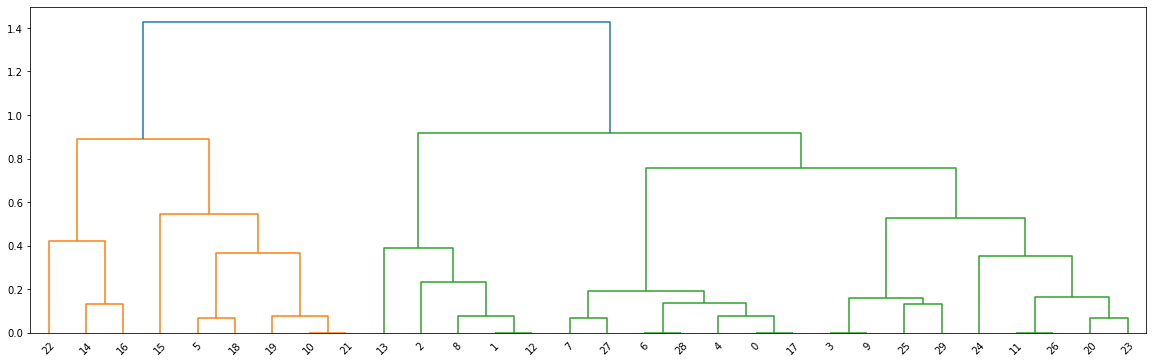

In [1]:
from sklearn import datasets  #导入数据集
from sklearn import preprocessing   #导出数据预处理包
import numpy as np    #导入np数据
import  matplotlib.pyplot as plt  #导入画图包
from scipy.cluster.hierarchy import linkage, dendrogram #导入层次画图包
#导入数据集
iris = datasets.load_iris()  #导入鸢尾花数据集
iris_data = iris.data       #赋值数据
print(iris_data)          #输出数据集
data = np.array(iris_data[:30,1:-1]) #选取前30个样本进行层次聚类
min_max_scaler = preprocessing.MinMaxScaler() #将数据进行归一化处理 [0,1]
data_M = min_max_scaler.fit_transform(data)  #数据归一化
print(data_M)  #输出数据
from scipy.cluster.hierarchy import linkage, dendrogram  #导入层次聚类包
plt.figure(figsize=(20,6))  #画图层次聚类图
#层次聚类，采用离差平方和欧式距离作为类间和类内度量方式
Z = linkage(data_M, method='ward', metric='euclidean') #调用SK提供层次聚类方法
p = dendrogram(Z, 0)     #画出层次聚类图
plt.show()  #展示层次聚类树

#  随机森林


In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
iris = load_iris()   #导入鸢尾花数据集
X1 = iris.data       #数据
y = iris.target      #数据标签
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=0)
#将训练数据集和测试数据集按7.5和2.5划分，（交叉验证）
sc = StandardScaler() #数据标准化
X_train = sc.fit_transform(X_train) #将训练数据归一化（0,1）
X_test = sc.transform(X_test) #将测试数据归一化（0,1）
RF = RandomForestClassifier(n_estimators=100, n_jobs=4, max_depth=10)
#建立随机森林分类器  
#参数 n_estimators 随机森林中决策树的数量
# n-jobs 拟合和预测的并行运行的工作 
#随机森林这个算法很适合进行并行计算，他是我们大数据平台中常用的一种分类方法
# max_depth 决策树的最大深度。
RF.fit(X_train, y_train) #随机森林75%训练数据
y_pred = RF.predict(X_test) #预测25%数据
print("随机森林分类准确率:", accuracy_score(y_test, y_pred)) 
print("其他指标：\n", classification_report(y_test, y_pred, target_names=['0', '1', '2']))

随机森林分类准确率: 0.9736842105263158
其他指标：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [4]:
from sklearn.model_selection import train_test_split # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut # 交叉验证所需的子集划分方法
from sklearn import datasets # 自带数据集 
iris = datasets.load_iris() # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)
# 交叉验证划分训练集和测试集.test_size为测试集所占的比例--->简单交叉验证
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  
#第一种简单交叉验证 6:4 或者 7:3 或者 8:2  y预测值 x训练值
print("简单交叉验证按0.4比例为验证集划分：",X_train.shape,X_test.shape)

# k折划分子集 
kf = KFold(n_splits=10) 
for train, test in kf.split(iris.data): 
    print("k折划分：%s %s" % (train.shape, test.shape)) 
    break 
    
# 留一划分子集 
loo = LeaveOneOut() 
for train, test in loo.split(iris.data): 
    print("留一划分：%s %s" % (train.shape, test.shape)) 

样本集大小： (150, 4) (150,)
简单交叉验证按0.4比例为验证集划分： (90, 4) (60, 4)
k折划分：(135,) (15,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：(149,) (1,)
留一划分：

聚类个数为 : 3


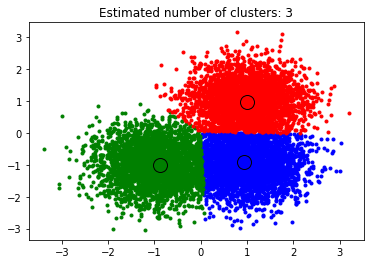

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth #导入SK K-Means
from sklearn.datasets import make_blobs
# 生成样本数据
centers = [[1, 1], [-1, -1], [1, -1]]   #人为指定聚类的中心点
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)  #调用K-Means方法
ms.fit(X)   #聚类
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("聚类个数为 : %d" % n_clusters_)
# 画图
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 数据标准化

<ipython-input-7-b0ff79c79e48>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  cps = np.random.random_integers(0, 100, (100, 2))


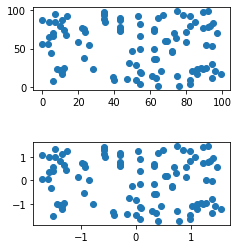

data is  [[ 2.68267739]
 [48.16881008]
 [22.68613138]
 [58.06112043]
 [94.12656264]
 [65.14993366]
 [60.16834987]
 [58.09592505]
 [32.16062561]
 [19.29034441]]
after standard  [[-1.7007151 ]
 [ 0.08272025]
 [-0.91641305]
 [ 0.47058123]
 [ 1.88464702]
 [ 0.74852176]
 [ 0.55320217]
 [ 0.47194586]
 [-0.54493395]
 [-1.04955619]]
after inverse  [[ 2.68267739]
 [48.16881008]
 [22.68613138]
 [58.06112043]
 [94.12656264]
 [65.14993366]
 [60.16834987]
 [58.09592505]
 [32.16062561]
 [19.29034441]]
after standard mean and std is  -8.881784197001253e-17 1.0


In [7]:
from sklearn.preprocessing import StandardScaler   #数据标准化包  归一化是标准化一种
from sklearn.preprocessing import MinMaxScaler   #导入MinMaxScaler
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt

cps = np.random.random_integers(0, 100, (100, 2))
ss = StandardScaler()
std_cps = ss.fit_transform(cps)
gs = gridspec.GridSpec(5,5)
fig = plt.figure()
ax1 = fig.add_subplot(gs[0:2, 1:4])
ax2 = fig.add_subplot(gs[3:5, 1:4])
ax1.scatter(cps[:, 0], cps[:, 1])
ax2.scatter(std_cps[:, 0], std_cps[:, 1])
plt.show()     #画出散点图
#X : numpy array of shape [n_samples,n_features]Training set.
data = np.random.uniform(0, 100, 10)[:, np.newaxis]  #去前10个数据展示
ss = StandardScaler()
std_data = ss.fit_transform(data)
origin_data = ss.inverse_transform(std_data)
print('data is ',data)
print('after standard ',std_data)
print('after inverse ',origin_data)
print('after standard mean and std is ',np.mean(std_data), np.std(std_data))

In [8]:
import numpy as np
data = np.random.uniform(0, 100, 10)[:, np.newaxis]
mm = MinMaxScaler()   #归一化
mm_data = mm.fit_transform(data)  #输出归一化
origin_data = mm.inverse_transform(mm_data)  #还原成原始数据
print('data is ',data)
print('after Min Max ',mm_data)
print('origin data is ',origin_data)

data is  [[48.16835419]
 [12.95776855]
 [95.56277587]
 [91.43542178]
 [19.81028001]
 [84.68933322]
 [33.63646618]
 [71.6852992 ]
 [26.04940554]
 [92.72873532]]
after Min Max  [[0.42625244]
 [0.        ]
 [1.        ]
 [0.95003506]
 [0.08295516]
 [0.86836824]
 [0.25033225]
 [0.71094396]
 [0.15848479]
 [0.96569166]]
origin data is  [[48.16835419]
 [12.95776855]
 [95.56277587]
 [91.43542178]
 [19.81028001]
 [84.68933322]
 [33.63646618]
 [71.6852992 ]
 [26.04940554]
 [92.72873532]]


In [1]:
from sklearn.datasets import load_iris    #导入数据集
from sklearn.model_selection import train_test_split #数据集分割 训练集和测试集 
from sklearn.neighbors import KNeighborsClassifier # 导入KNN算法包
iris=load_iris()  #导入鸢尾花数据
x = iris.data     #数据集中数据特征
y = iris.target    #数据集中的数据标签
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0) #数据集分割
knn=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='ball_tree',leaf_size=30)      #实例化KNN模型
knn.fit(x_train, y_train)      #拟合训练数据
score=knn.score(x_test, y_test)
print('KNN分类预测准确性为:{:.2f}'.format(score*100,'0.2f')+'%')   

KNN分类预测准确性为:97.78%


In [1]:
# 导入高斯朴素贝叶斯分类器
from sklearn.naive_bayes import GaussianNB  #导入朴素贝叶斯包
from sklearn.datasets import load_wine       #导入红酒数据集
from sklearn.model_selection import train_test_split  #导入交叉验证包
wine = load_wine()   # 加载红酒数据集
x = wine.data        #红酒数据集里面的属性（数据）赋值给x
y = wine.target       #数据标签（类别）赋值给y
#划分数据集，70%的数据训练，30%的数据预测
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
gnb = GaussianNB()   #基于高斯分布朴素贝叶斯分类器
gnb.fit(x_train, y_train) #模型训练和预测
score =gnb.score(x_test, y_test) #模型预测
print('高斯朴素贝叶斯分类准确率为:{:.2f}'.format(score*100,'0.2f')+'%')

高斯朴素贝叶斯分类准确率为:94.44%


In [1]:
from sklearn.datasets import load_breast_cancer #导入乳腺癌数据集
from sklearn.svm import SVC    #导入SVM算法库
from sklearn.model_selection import train_test_split  #划分数据集
cancers = load_breast_cancer()   # 导入Sklearn自带的乳腺癌数据集
x = cancers.data       #数据集的数据赋值给变量x
y = cancers.target     #数据集的标签赋值给y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
#数据集的划分7:3
SVM = SVC(C=1.0, kernel='linear')  # 线性核
SVM.fit(x_train, y_train)  #模型训练和拟合
score = SVM.score(x_test, y_test)  #评估效果
print('SVM分类预测准确性为:{:.2f}'.format(score*100,'0.2f')+'%')   

SVM分类预测准确性为:95.91%


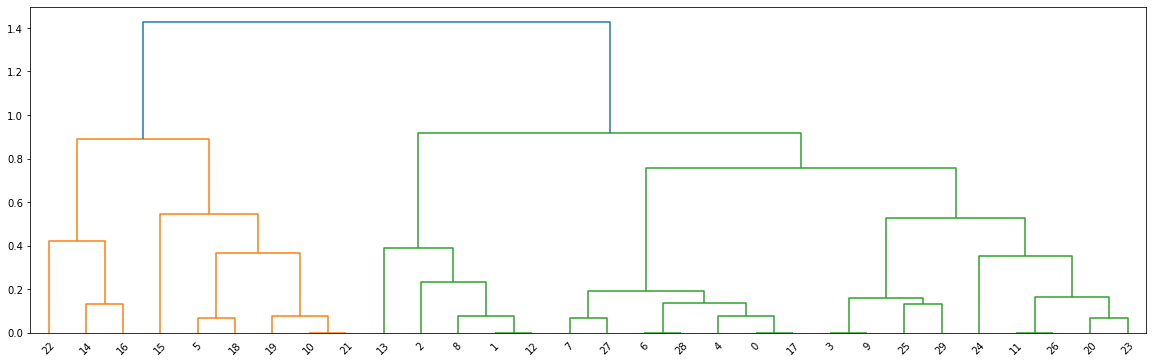

In [2]:
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import  matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
#导入数据集
iris = datasets.load_iris()
iris_data = iris.data
#print(iris_data)
#选取前30个样本进行层次聚类
data = np.array(iris_data[:30,1:-1])
#将数据进行归一化处理
min_max_scaler = preprocessing.MinMaxScaler()
data_M = min_max_scaler.fit_transform(data)
#print(data_M)
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20,6))
#层次聚类，采用离差平方和欧式距离作为类间和类内度量方式
Z = linkage(data_M, method='ward', metric='euclidean')
p = dendrogram(Z, 0)
plt.show()

In [3]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# 生成样本数据
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("聚类个数为 : %d" % n_clusters_)

聚类个数为 : 3


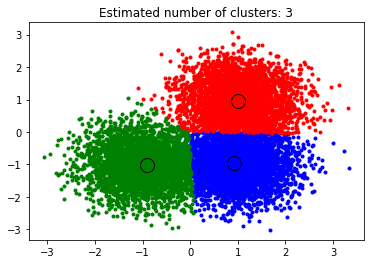

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

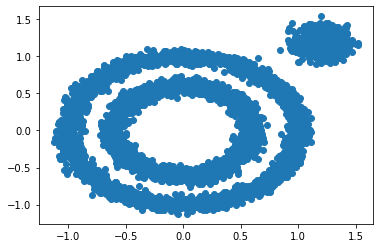

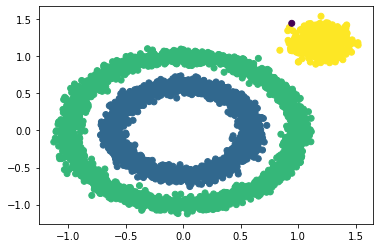

In [2]:
import numpy as np #导入numpy包
import matplotlib.pyplot as plt #导入画图包
from sklearn import datasets  #导入数据框架
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,noise=.05)#训练数据
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]], random_state=9)#测试数据
X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()  #画出数据点分布图

from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #画出聚类后的散点图
plt.show()

In [1]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston_house_price = datasets.load_boston()  #导入boston房价数据集
X = boston_house_price.data #导入数据集特征
Y = boston_house_price.target  #导入数据集的标签
#X = boston_house_price.data#获取特征数据
print(X) #输出原始的数据集
X_std = StandardScaler().fit_transform(X) #数据标准化
pca = PCA(n_components = 3)    #调用pca方法
pca.fit(X_std) #  训练数据
new_data = X.dot(pca.components_.T)   #显示数据
print(new_data[:10])#打印出转换后的前十行数据做一个展示

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[[ 38.89018107  32.93532391 -51.87396066]
 [ 33.02343232  54.79866941 -71.20799688]
 [ 26.53873512  48.76840918 -67.85363879]
 [ 12.75698667  47.78351826 -72.33882223]
 [ 15.65240562  50.77871883 -73.70920814]
 [ 17.71686561  51.4336294  -73.35783472]
 [ 51.22331968  29.63835929 -51.11003359]
 [ 62.1527616   38.52240664 -53.72636333]
 [ 68.87661773  36.34017288 -53.90249412]
 [ 60.21849172  32.80458593 -50.06565433]]


# LDA


In [2]:
from sklearn import datasets # 自带数据集 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #导入LDA算法
iris = datasets.load_iris() # 加载鸢尾花数据集
iris_x = iris.data  #导入鸢尾花数据
y = iris.target    #导入标签
lda = LDA(n_components=2)  #设置转换后的维度为2维数据
new_x = lda.fit_transform(iris_x,y)  #拟合LDA算法
new_x    #输出转换后的数据

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

1.0


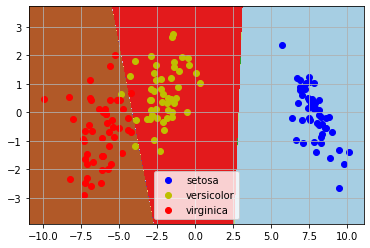

In [3]:
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

def main():
    iris = datasets.load_iris() #典型分类数据模型用pandas处理
    data = pd.DataFrame(iris.data, columns=iris.feature_names)
    data['class'] = iris.target   
    X = data[data.columns.drop('class')]
    Y = data['class']
    #划分数据集
    X_train, X_test, Y_train, Y_test =train_test_split(X, Y)
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(X_train, Y_train)
    
    #显示训练结果
   
    print (lda.score(X_test, Y_test)) #score是指分类的正确率
    

    X_2d = lda.transform(X) 
    #对于二维数据，可视化
    #区域划分
    lda.fit(X_2d,Y)
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    #做出原来的散点图
    class1_x = X_2d[Y==0,0]
    class1_y = X_2d[Y==0,1]
    l1 = plt.scatter(class1_x,class1_y,color='b',label=iris.target_names[0])
    class1_x = X_2d[Y==1,0]
    class1_y = X_2d[Y==1,1]
    l2 = plt.scatter(class1_x,class1_y,color='y',label=iris.target_names[1])
    class1_x = X_2d[Y==2,0]
    class1_y = X_2d[Y==2,1]
    l3 = plt.scatter(class1_x,class1_y,color='r',label=iris.target_names[2])
    
    plt.legend(handles = [l1, l2, l3], loc = 'best')
    
    plt.grid(True)
    plt.show()

if __name__ == '__main__':main()